In [ ]:
!wget http://www.lawrence.edu/fast/greggj/CMSC490/cats_vs_dogs_small.zip
!unzip cats_vs_dogs_small.zip

In [1]:
import pathlib
new_base_dir = pathlib.Path("cats_vs_dogs_small")

**Instantiating a small convnet for dogs vs. cats classification**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2023-09-26 10:36:54.103817: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-26 10:36:54.128021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 10:36:55.034033: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-26 10:36:55.053596: I tensorflow/compiler/xla/

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [3]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.mdl",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20


2023-09-26 09:58:05.153368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-09-26 09:58:05.302897: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-26 09:58:05.304541: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f161948eae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-26 09:58:05.304552: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2023-09-26 09:58:05.306945: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-26 09:58:05.357394: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

123/125 [============================>.] - ETA: 0s - loss: 0.7122 - accuracy: 0.5249INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


125/125 [==============================] - 4s 18ms/step - loss: 0.7119 - accuracy: 0.5250 - val_loss: 0.6797 - val_accuracy: 0.5780
Epoch 2/20
125/125 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.5642INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.6856 - accuracy: 0.5642 - val_loss: 0.6567 - val_accuracy: 0.6660
Epoch 3/20
121/125 [============================>.] - ETA: 0s - loss: 0.6577 - accuracy: 0.6224INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


125/125 [==============================] - 2s 17ms/step - loss: 0.6560 - accuracy: 0.6260 - val_loss: 0.5815 - val_accuracy: 0.7070
Epoch 4/20
124/125 [============================>.] - ETA: 0s - loss: 0.6085 - accuracy: 0.6744INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.6086 - accuracy: 0.6740 - val_loss: 0.5706 - val_accuracy: 0.6870
Epoch 5/20
121/125 [============================>.] - ETA: 0s - loss: 0.5629 - accuracy: 0.7100INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


125/125 [==============================] - 2s 17ms/step - loss: 0.5630 - accuracy: 0.7092 - val_loss: 0.5458 - val_accuracy: 0.7040
Epoch 6/20
125/125 [==============================] - 2s 14ms/step - loss: 0.5162 - accuracy: 0.7450 - val_loss: 0.5536 - val_accuracy: 0.7330
Epoch 7/20
125/125 [==============================] - 2s 14ms/step - loss: 0.4942 - accuracy: 0.7697 - val_loss: 0.5469 - val_accuracy: 0.7400
Epoch 8/20
121/125 [============================>.] - ETA: 0s - loss: 0.4400 - accuracy: 0.7911INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


125/125 [==============================] - 2s 16ms/step - loss: 0.4382 - accuracy: 0.7925 - val_loss: 0.4813 - val_accuracy: 0.7680
Epoch 9/20
125/125 [==============================] - 2s 14ms/step - loss: 0.3866 - accuracy: 0.8275 - val_loss: 0.4821 - val_accuracy: 0.7740
Epoch 10/20
122/125 [============================>.] - ETA: 0s - loss: 0.3259 - accuracy: 0.8566INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch.mdl/assets


125/125 [==============================] - 2s 17ms/step - loss: 0.3257 - accuracy: 0.8580 - val_loss: 0.4719 - val_accuracy: 0.8020
Epoch 11/20
125/125 [==============================] - 2s 14ms/step - loss: 0.2797 - accuracy: 0.8817 - val_loss: 0.6001 - val_accuracy: 0.7630
Epoch 12/20
125/125 [==============================] - 2s 14ms/step - loss: 0.2178 - accuracy: 0.9062 - val_loss: 0.5569 - val_accuracy: 0.7840
Epoch 13/20
125/125 [==============================] - 2s 14ms/step - loss: 0.1789 - accuracy: 0.9295 - val_loss: 0.5966 - val_accuracy: 0.7870
Epoch 14/20
125/125 [==============================] - 2s 14ms/step - loss: 0.1210 - accuracy: 0.9565 - val_loss: 0.6699 - val_accuracy: 0.8100
Epoch 15/20
125/125 [==============================] - 2s 14ms/step - loss: 0.1278 - accuracy: 0.9548 - val_loss: 0.7448 - val_accuracy: 0.7930
Epoch 16/20
125/125 [==============================] - 2s 14ms/step - loss: 0.0791 - accuracy: 0.9700 - val_loss: 1.0110 - val_accuracy: 0.7900
Epoc

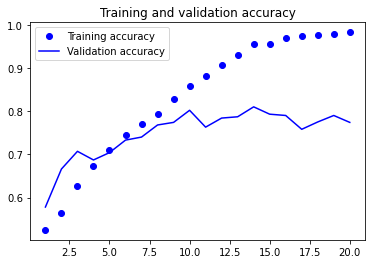

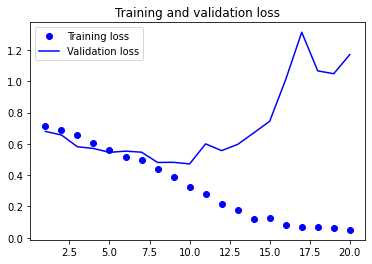

In [6]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [7]:
test_model = keras.models.load_model("convnet_from_scratch.mdl")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 8ms/step - loss: 0.4910 - accuracy: 0.7925
Test accuracy: 0.793


### Using data augmentation

In [8]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

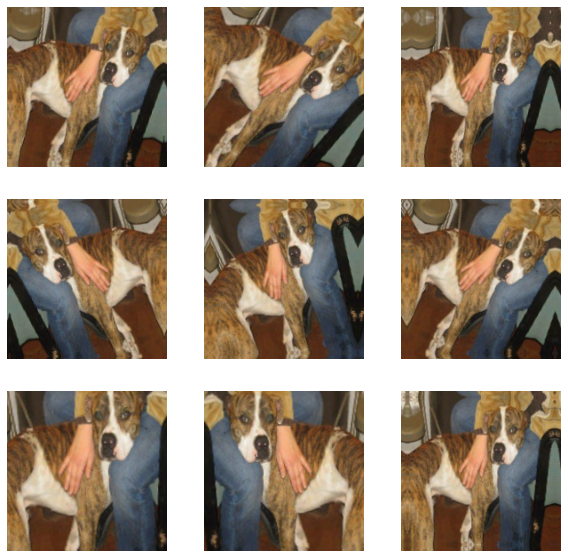

In [14]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.mdl",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
122/125 [============================>.] - ETA: 0s - loss: 0.7147 - accuracy: 0.5126INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 20ms/step - loss: 0.7141 - accuracy: 0.5132 - val_loss: 0.6904 - val_accuracy: 0.5420
Epoch 2/100
123/125 [============================>.] - ETA: 0s - loss: 0.6795 - accuracy: 0.5808INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 20ms/step - loss: 0.6792 - accuracy: 0.5817 - val_loss: 0.6225 - val_accuracy: 0.6600
Epoch 3/100
121/125 [============================>.] - ETA: 0s - loss: 0.6442 - accuracy: 0.6338INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 2s 20ms/step - loss: 0.6430 - accuracy: 0.6348 - val_loss: 0.6017 - val_accuracy: 0.6660
Epoch 4/100
124/125 [============================>.] - ETA: 0s - loss: 0.6258 - accuracy: 0.6527INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 20ms/step - loss: 0.6255 - accuracy: 0.6525 - val_loss: 0.5771 - val_accuracy: 0.7080
Epoch 5/100
125/125 [==============================] - 2s 15ms/step - loss: 0.6032 - accuracy: 0.6697 - val_loss: 0.6816 - val_accuracy: 0.6690
Epoch 6/100
122/125 [============================>.] - ETA: 0s - loss: 0.5894 - accuracy: 0.6939INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 21ms/step - loss: 0.5901 - accuracy: 0.6935 - val_loss: 0.5675 - val_accuracy: 0.7040
Epoch 7/100
123/125 [============================>.] - ETA: 0s - loss: 0.5599 - accuracy: 0.7223INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 20ms/step - loss: 0.5595 - accuracy: 0.7240 - val_loss: 0.5395 - val_accuracy: 0.7270
Epoch 8/100
121/125 [============================>.] - ETA: 0s - loss: 0.5514 - accuracy: 0.7226INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.5519 - accuracy: 0.7220 - val_loss: 0.5352 - val_accuracy: 0.7300
Epoch 9/100
125/125 [==============================] - 2s 16ms/step - loss: 0.5260 - accuracy: 0.7470 - val_loss: 0.5720 - val_accuracy: 0.7220
Epoch 10/100
124/125 [============================>.] - ETA: 0s - loss: 0.5229 - accuracy: 0.7445INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 21ms/step - loss: 0.5219 - accuracy: 0.7452 - val_loss: 0.4606 - val_accuracy: 0.7870
Epoch 11/100
122/125 [============================>.] - ETA: 0s - loss: 0.5025 - accuracy: 0.7569INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.5022 - accuracy: 0.7575 - val_loss: 0.4306 - val_accuracy: 0.8080
Epoch 12/100
125/125 [==============================] - 2s 15ms/step - loss: 0.4819 - accuracy: 0.7707 - val_loss: 0.4406 - val_accuracy: 0.7870
Epoch 13/100
125/125 [==============================] - 2s 15ms/step - loss: 0.4718 - accuracy: 0.7810 - val_loss: 0.4471 - val_accuracy: 0.7900
Epoch 14/100
124/125 [============================>.] - ETA: 0s - loss: 0.4472 - accuracy: 0.7949INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.4463 - accuracy: 0.7952 - val_loss: 0.4079 - val_accuracy: 0.8340
Epoch 15/100
124/125 [============================>.] - ETA: 0s - loss: 0.4484 - accuracy: 0.7896INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 20ms/step - loss: 0.4480 - accuracy: 0.7897 - val_loss: 0.3936 - val_accuracy: 0.8280
Epoch 16/100
125/125 [==============================] - 2s 15ms/step - loss: 0.4260 - accuracy: 0.8027 - val_loss: 0.3966 - val_accuracy: 0.8070
Epoch 17/100
122/125 [============================>.] - ETA: 0s - loss: 0.4263 - accuracy: 0.8048INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.4260 - accuracy: 0.8060 - val_loss: 0.3828 - val_accuracy: 0.8350
Epoch 18/100
125/125 [==============================] - 2s 15ms/step - loss: 0.4180 - accuracy: 0.8117 - val_loss: 0.3909 - val_accuracy: 0.8240
Epoch 19/100
125/125 [==============================] - 2s 16ms/step - loss: 0.4057 - accuracy: 0.8115 - val_loss: 0.4188 - val_accuracy: 0.7970
Epoch 20/100
125/125 [==============================] - 2s 16ms/step - loss: 0.3954 - accuracy: 0.8188 - val_loss: 0.3836 - val_accuracy: 0.8180
Epoch 21/100
123/125 [============================>.] - ETA: 0s - loss: 0.3854 - accuracy: 0.8242INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 2s 19ms/step - loss: 0.3849 - accuracy: 0.8253 - val_loss: 0.3651 - val_accuracy: 0.8370
Epoch 22/100
124/125 [============================>.] - ETA: 0s - loss: 0.3794 - accuracy: 0.8329INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 21ms/step - loss: 0.3795 - accuracy: 0.8330 - val_loss: 0.3599 - val_accuracy: 0.8340
Epoch 23/100
125/125 [==============================] - 2s 16ms/step - loss: 0.3779 - accuracy: 0.8347 - val_loss: 0.3902 - val_accuracy: 0.8270
Epoch 24/100
125/125 [==============================] - 2s 15ms/step - loss: 0.3774 - accuracy: 0.8322 - val_loss: 0.4143 - val_accuracy: 0.8150
Epoch 25/100
125/125 [==============================] - 2s 15ms/step - loss: 0.3466 - accuracy: 0.8522 - val_loss: 0.3659 - val_accuracy: 0.8420
Epoch 26/100
125/125 [==============================] - 2s 15ms/step - loss: 0.3403 - accuracy: 0.8480 - val_loss: 0.4742 - val_accuracy: 0.8180
Epoch 27/100
125/125 [==============================] - ETA: 0s - loss: 0.3445 - accuracy: 0.8550INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 20ms/step - loss: 0.3445 - accuracy: 0.8550 - val_loss: 0.3435 - val_accuracy: 0.8540
Epoch 28/100
125/125 [==============================] - 2s 15ms/step - loss: 0.3271 - accuracy: 0.8540 - val_loss: 0.3734 - val_accuracy: 0.8270
Epoch 29/100
125/125 [==============================] - 2s 15ms/step - loss: 0.3102 - accuracy: 0.8635 - val_loss: 0.3608 - val_accuracy: 0.8480
Epoch 30/100
125/125 [==============================] - 2s 16ms/step - loss: 0.3205 - accuracy: 0.8660 - val_loss: 0.3757 - val_accuracy: 0.8630
Epoch 31/100
125/125 [==============================] - 2s 16ms/step - loss: 0.3028 - accuracy: 0.8795 - val_loss: 0.3647 - val_accuracy: 0.8610
Epoch 32/100
125/125 [==============================] - 2s 15ms/step - loss: 0.2942 - accuracy: 0.8720 - val_loss: 0.3874 - val_accuracy: 0.8560
Epoch 33/100
125/125 [==============================] - 2s 15ms/step - loss: 0.3030 - accuracy: 0.8675 - val_loss: 0.3575 - val_accuracy: 0.862

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 2s 20ms/step - loss: 0.2902 - accuracy: 0.8802 - val_loss: 0.3324 - val_accuracy: 0.8680
Epoch 35/100
125/125 [==============================] - 2s 15ms/step - loss: 0.2707 - accuracy: 0.8870 - val_loss: 0.3893 - val_accuracy: 0.8490
Epoch 36/100
125/125 [==============================] - 2s 15ms/step - loss: 0.2795 - accuracy: 0.8857 - val_loss: 0.3675 - val_accuracy: 0.8520
Epoch 37/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2656 - accuracy: 0.8863 - val_loss: 0.3628 - val_accuracy: 0.8650
Epoch 38/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2579 - accuracy: 0.8923 - val_loss: 0.4607 - val_accuracy: 0.8430
Epoch 39/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2597 - accuracy: 0.8923 - val_loss: 0.3399 - val_accuracy: 0.8600
Epoch 40/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2541 - accuracy: 0.8947 - val_loss: 0.3336 - val_accuracy: 0.868

INFO:tensorflow:Assets written to: convnet_from_scratch_with_augmentation.mdl/assets


125/125 [==============================] - 3s 20ms/step - loss: 0.2406 - accuracy: 0.8982 - val_loss: 0.2932 - val_accuracy: 0.8980
Epoch 47/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2492 - accuracy: 0.8988 - val_loss: 0.4133 - val_accuracy: 0.8600
Epoch 48/100
125/125 [==============================] - 2s 15ms/step - loss: 0.2414 - accuracy: 0.9022 - val_loss: 0.3340 - val_accuracy: 0.8980
Epoch 49/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2194 - accuracy: 0.9125 - val_loss: 0.3298 - val_accuracy: 0.9000
Epoch 50/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2606 - accuracy: 0.9053 - val_loss: 0.3781 - val_accuracy: 0.8790
Epoch 51/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2216 - accuracy: 0.9145 - val_loss: 0.3968 - val_accuracy: 0.8810
Epoch 52/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2350 - accuracy: 0.9065 - val_loss: 0.4665 - val_accuracy: 0.864

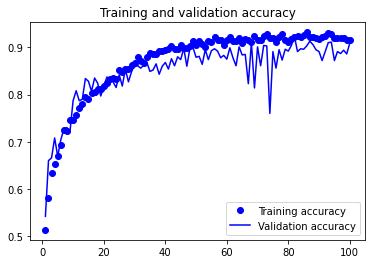

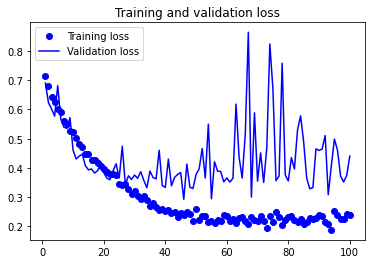

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [12]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.mdl")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 8ms/step - loss: 0.3115 - accuracy: 0.8930
Test accuracy: 0.893


## Leveraging a pretrained model

In [4]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Extracting the VGG16 features and corresponding labels**

In [6]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

2023-09-26 10:37:36.186023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902


1/1 [==============================] - 0s 131ms/step


In [7]:
train_features.shape

(4000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [8]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.mdl",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20


2023-09-26 10:37:58.963723: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-26 10:37:58.988197: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f82a2f59160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-26 10:37:58.988218: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2023-09-26 10:37:58.990599: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-26 10:37:59.038648: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


117/125 [===========================>..] - ETA: 0s - loss: 14.4463 - accuracy: 0.9402INFO:tensorflow:Assets written to: feature_extraction.mdl/assets


INFO:tensorflow:Assets written to: feature_extraction.mdl/assets


125/125 [==============================] - 1s 5ms/step - loss: 14.0945 - accuracy: 0.9410 - val_loss: 3.8355 - val_accuracy: 0.9800
Epoch 2/20
125/125 [==============================] - 0s 4ms/step - loss: 3.6402 - accuracy: 0.9793 - val_loss: 4.4071 - val_accuracy: 0.9740
Epoch 3/20
125/125 [==============================] - 0s 3ms/step - loss: 2.2217 - accuracy: 0.9870 - val_loss: 6.1130 - val_accuracy: 0.9730
Epoch 4/20
125/125 [==============================] - 0s 4ms/step - loss: 1.8096 - accuracy: 0.9893 - val_loss: 5.6800 - val_accuracy: 0.9680
Epoch 5/20
125/125 [==============================] - 0s 4ms/step - loss: 0.9660 - accuracy: 0.9920 - val_loss: 7.2568 - val_accuracy: 0.9710
Epoch 6/20
125/125 [==============================] - 0s 3ms/step - loss: 0.9871 - accuracy: 0.9930 - val_loss: 7.2388 - val_accuracy: 0.9730
Epoch 7/20
125/125 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.9958 - val_loss: 7.3196 - val_accuracy: 0.9700
Epoch 8/20
125/1

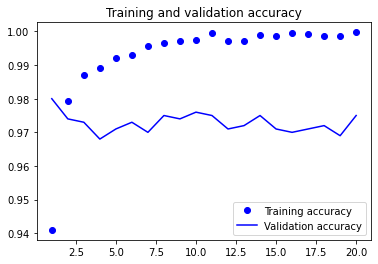

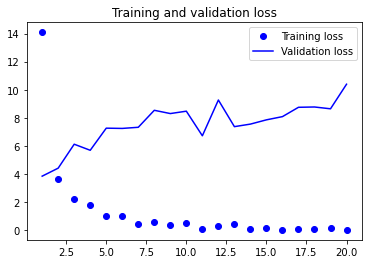

In [9]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Fine-tuning a pretrained model

In [10]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [14]:
inputs = keras.Input(shape=(180, 180, 3))
x = conv_base(inputs)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [15]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.mdl",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
125/125 [==============================] - ETA: 0s - loss: 3.4051 - accuracy: 0.8060INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


125/125 [==============================] - 6s 43ms/step - loss: 3.4051 - accuracy: 0.8060 - val_loss: 0.5805 - val_accuracy: 0.9300
Epoch 2/30
125/125 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.9260INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


125/125 [==============================] - 5s 43ms/step - loss: 0.5682 - accuracy: 0.9260 - val_loss: 0.4000 - val_accuracy: 0.9390
Epoch 3/30
125/125 [==============================] - 5s 37ms/step - loss: 0.2970 - accuracy: 0.9548 - val_loss: 0.4066 - val_accuracy: 0.9410
Epoch 4/30
125/125 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9768INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


125/125 [==============================] - 5s 44ms/step - loss: 0.1148 - accuracy: 0.9768 - val_loss: 0.3488 - val_accuracy: 0.9510
Epoch 5/30
125/125 [==============================] - ETA: 0s - loss: 0.0897 - accuracy: 0.9847INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


125/125 [==============================] - 5s 42ms/step - loss: 0.0897 - accuracy: 0.9847 - val_loss: 0.3479 - val_accuracy: 0.9490
Epoch 6/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0482 - accuracy: 0.9887 - val_loss: 0.3881 - val_accuracy: 0.9520
Epoch 7/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0217 - accuracy: 0.9942 - val_loss: 0.3527 - val_accuracy: 0.9560
Epoch 8/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.3704 - val_accuracy: 0.9560
Epoch 9/30
125/125 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9970INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


INFO:tensorflow:Assets written to: fine_tuning.mdl/assets


125/125 [==============================] - 5s 43ms/step - loss: 0.0209 - accuracy: 0.9970 - val_loss: 0.3472 - val_accuracy: 0.9570
Epoch 10/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0174 - accuracy: 0.9958 - val_loss: 0.3631 - val_accuracy: 0.9620
Epoch 11/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0195 - accuracy: 0.9962 - val_loss: 0.3857 - val_accuracy: 0.9610
Epoch 12/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.3529 - val_accuracy: 0.9620
Epoch 13/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0074 - accuracy: 0.9992 - val_loss: 0.4171 - val_accuracy: 0.9610
Epoch 14/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0070 - accuracy: 0.9973 - val_loss: 0.4167 - val_accuracy: 0.9670
Epoch 15/30
125/125 [==============================] - 5s 37ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.4040 - val_accuracy: 0.9630
Epoc

In [17]:
model = keras.models.load_model("fine_tuning.mdl")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 31ms/step - loss: 0.4129 - accuracy: 0.9520
Test accuracy: 0.952
